In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

from lime import lime_image

from unboxer.class_heatmap import ClassHeatmap

Using TensorFlow backend.


In [2]:
cam = ClassHeatmap(model_architecture='vgg16',
                         img_shape=(224,224))

In [3]:
cam.model_.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

Working on filters: [1]
('Rottweiler', 0.14395386)
('black-and-tan_coonhound', 0.13883996)
('bluetick', 0.12469079)
('Gordon_setter', 0.068692818)
('Brabancon_griffon', 0.052342661)


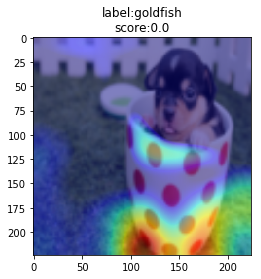

<function unboxer.class_heatmap.ClassHeatmap.plot.<locals>._plot>

In [8]:
IMG_PATH = '/mnt/ml-team/homes/jakub.czakon/.unblackboxing_webinar_data/data/dogs/input/dog_in_a_mug.png'
cam.plot_cam(img_path=IMG_PATH)

Working on filters: [504]
('whippet', 0.440193)
('Saluki', 0.25357836)
('Italian_greyhound', 0.082741216)
('Rhodesian_ridgeback', 0.071143486)
('Ibizan_hound', 0.068220541)


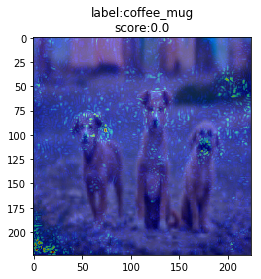

In [7]:
cam.plot_saliency(img_path=IMG_PATH)